In [1]:
import mysql.connector
import pandas as pd

# Establish the connection to the MySQL database
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='YESno1996#@!',
    database='nw'
)

# Create a cursor object
cursor = conn.cursor()

# Execute a query
cursor.execute("SHOW TABLES")

# Fetch the results
tables = cursor.fetchall()
print("Tables in the database:")
for table in tables:
    print(table)

Tables in the database:
('customer_t',)
('order_t',)
('product_t',)
('shipper_t',)


In [2]:
# Run a SQL query and load the result into a pandas DataFrame
query = """
    select state, count(customer_id) as no_of_customers
from nw.customer_t
group by state
order by no_of_customers desc;
"""
# Execute the query
cursor.execute(query)

# Fetch the data and load it into a pandas DataFrame
data = pd.DataFrame(cursor.fetchall(), columns=['state', 'no_of_customers'])

# Display the first few rows to verify
print(data.head())


                  state  no_of_customers
0            California               97
1                 Texas               97
2               Florida               86
3              New York               69
4  District of Columbia               35


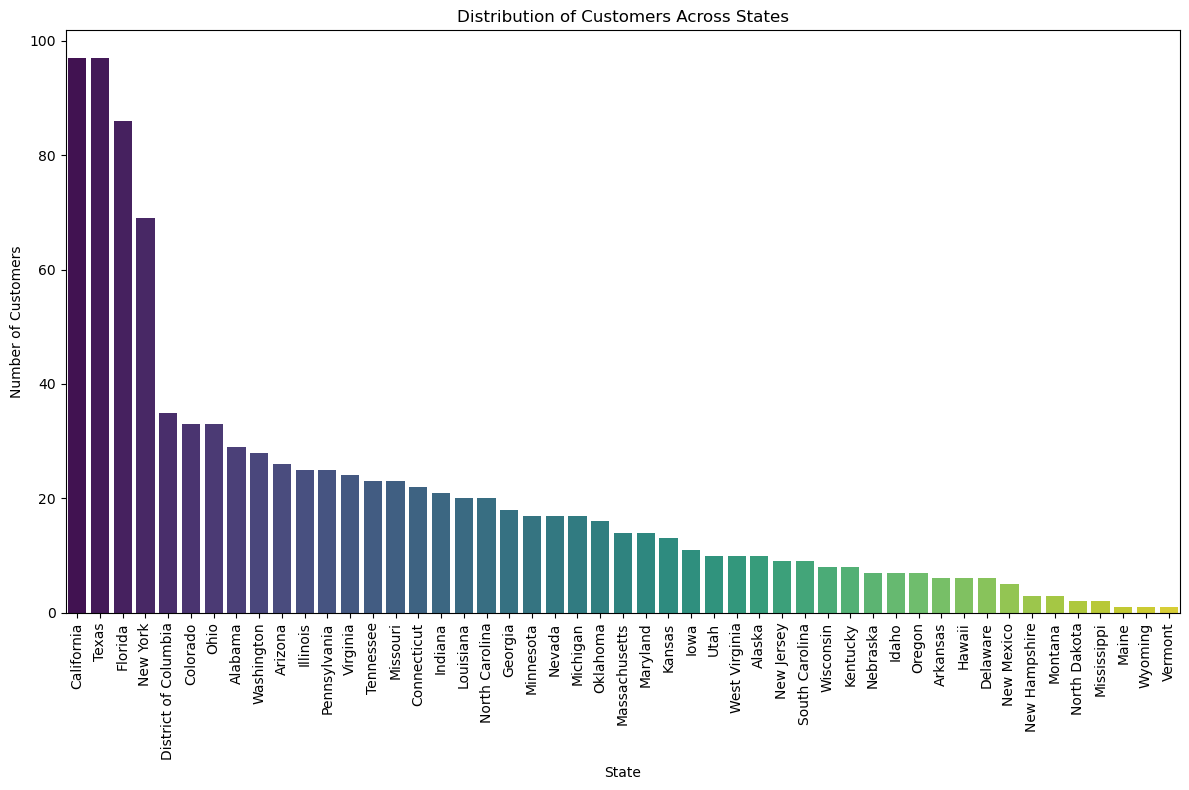

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='no_of_customers', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Customers Across States')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [4]:
# Run a SQL query and load the result into a pandas DataFrame
query2 = """
    WITH feed_bucket AS
(
    SELECT 
    CASE 
            WHEN customer_feedback = 'Very Good' THEN 5
            WHEN customer_feedback = 'Good' THEN 4
            WHEN customer_feedback = 'Okay' THEN 3
            WHEN customer_feedback = 'Bad' THEN 2
            WHEN customer_feedback = 'Very Bad' THEN 1
            END AS feedback_count,
            quarter_number
    FROM nw.order_t
)
SELECT 
      quarter_number,
      avg(feedback_count) avg_feedback
FROM feed_bucket
GROUP BY quarter_number
ORDER BY 1;
"""
# Execute the query
cursor.execute(query2)

# Fetch the data and load it into a pandas DataFrame
data2 = pd.DataFrame(cursor.fetchall(), columns=['quarter_number', 'avg_feedback'])

# Display the first few rows to verify
print(data2.head())

   quarter_number avg_feedback
0               1       3.5548
1               2       3.3550
2               3       2.9563
3               4       2.3970


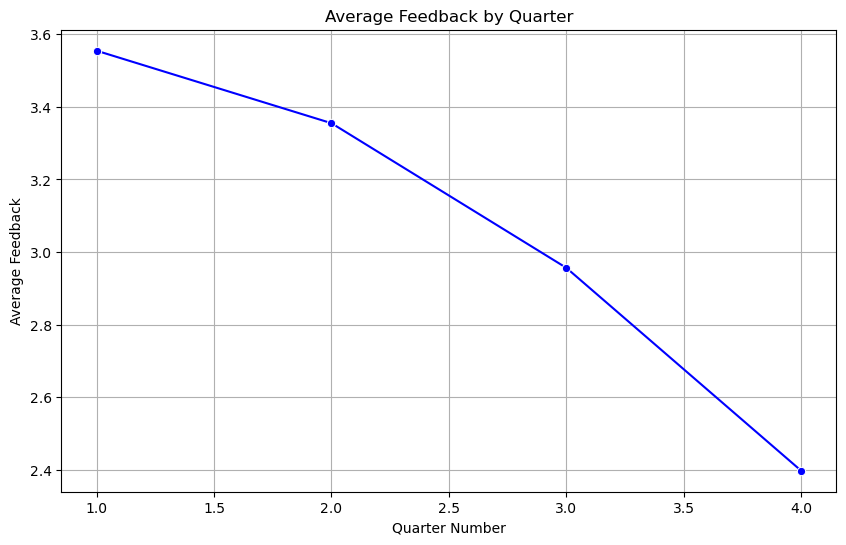

In [5]:
# Visualization for Query 2
plt.figure(figsize=(10, 6))
sns.lineplot(x='quarter_number', y='avg_feedback', data=data2, marker='o', color='b')
plt.title('Average Feedback by Quarter')
plt.xlabel('Quarter Number')
plt.ylabel('Average Feedback')
plt.grid(True)
plt.show()

In [6]:
# Run a SQL query and load the result into a pandas DataFrame
query3 = """
    WITH cust_feedback AS
(
	SELECT 
		quarter_number,
		SUM(CASE WHEN customer_feedback = 'Very Good' THEN 1 ELSE 0 END) AS very_good,
		SUM(CASE WHEN customer_feedback = 'Good' THEN 1 ELSE 0 END) AS good,
        SUM(CASE WHEN customer_feedback = 'Okay' THEN 1 ELSE 0 END) AS okay,
        SUM(CASE WHEN customer_feedback = 'Bad' THEN 1 ELSE 0 END) AS bad,
        SUM(CASE WHEN customer_feedback = 'Very Bad' THEN 1 ELSE 0 END) AS very_bad,
		COUNT(customer_feedback) AS total_feedbacks
	FROM nw.order_t
	GROUP BY quarter_number
)
SELECT quarter_number,
        (very_good/total_feedbacks)*100 perc_very_good,
        (good/total_feedbacks)*100 perc_good,
        (okay/total_feedbacks)*100 perc_okay,
        (bad/total_feedbacks)*100 perc_bad,
        (very_bad/total_feedbacks)*100 perc_very_bad
FROM cust_feedback
ORDER BY 1;
"""
# Execute the query
cursor.execute(query3)

# Fetch the data and load it into a pandas DataFrame
data3 = pd.DataFrame(cursor.fetchall(), columns=['quarter_number', 'perc_very_good', 'perc_good', 'perc_okay', 'perc_bad','perc_very_bad'])

# Display the first few rows to verify
print(data3.head())

   quarter_number perc_very_good perc_good perc_okay perc_bad perc_very_bad
0               1        30.0000   28.7097   19.0323  11.2903       10.9677
1               2        28.6260   22.1374   20.2290  14.1221       14.8855
2               3        16.5939   20.9607   21.8341  22.7074       17.9039
3               4        10.0503   10.0503   20.1005  29.1457       30.6533


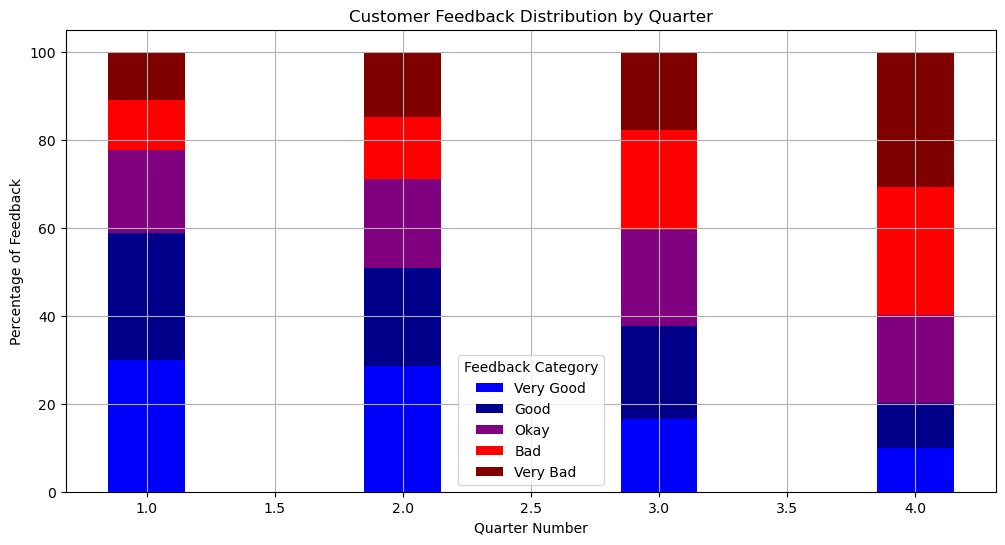

In [7]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))
bar_width = 0.3
# Plot a stacked bar chart
plt.bar(data3['quarter_number'], data3['perc_very_good'], label='Very Good', color='blue',width=bar_width)
plt.bar(data3['quarter_number'], data3['perc_good'], bottom=data3['perc_very_good'], label='Good', color='darkblue',width=bar_width)
plt.bar(data3['quarter_number'], data3['perc_okay'], bottom=data3['perc_very_good'] + data3['perc_good'], label='Okay', color='purple',width=bar_width)
plt.bar(data3['quarter_number'], data3['perc_bad'], bottom=data3['perc_very_good'] + data3['perc_good'] + data3['perc_okay'], label='Bad', color='red',width=bar_width)
plt.bar(data3['quarter_number'], data3['perc_very_bad'], bottom=data3['perc_very_good'] + data3['perc_good'] + data3['perc_okay'] + data3['perc_bad'], label='Very Bad', color='maroon',width=bar_width)

# Add labels and title
plt.xlabel('Quarter Number')
plt.ylabel('Percentage of Feedback')
plt.title('Customer Feedback Distribution by Quarter')
plt.legend(title='Feedback Category')
plt.grid(True)

# Show the plot
plt.show()

In [8]:
# Run a SQL query and load the result into a pandas DataFrame
query4 = """
    SELECT
      vehicle_maker,
      COUNT(DISTINCT cust.customer_id) as number_of_customers
FROM nw.product_t pro 
	JOIN nw.order_t od
	    ON pro.product_id = od.product_id
	JOIN nw.customer_t cust
	    ON od.customer_id = cust.customer_id
GROUP BY 1
ORDER BY 2 desc
LIMIT 5;  
"""
# Execute the query
cursor.execute(query4)

# Fetch the data and load it into a pandas DataFrame
data4 = pd.DataFrame(cursor.fetchall(), columns=['vehicle_maker', 'number_of_customers'])

# Display the first few rows to verify
print(data4.head())

  vehicle_maker  number_of_customers
0     Chevrolet                   83
1          Ford                   63
2        Toyota                   52
3         Dodge                   50
4       Pontiac                   50


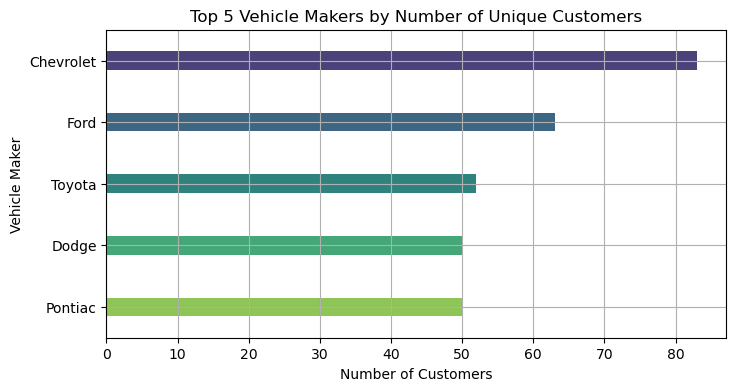

In [9]:
# Set up the figure and axis
plt.figure(figsize=(8, 4))

# Create the bar plot
sns.barplot(x='number_of_customers', y='vehicle_maker', data=data4, palette='viridis', width=0.3)

# Add labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Vehicle Maker')
plt.title('Top 5 Vehicle Makers by Number of Unique Customers')
plt.grid(True)

# Show the plot
plt.show()

In [10]:
# Run a SQL query and load the result into a pandas DataFrame
query5 = """
SELECT state, vehicle_maker, no_of_cust FROM (
	SELECT
		  state,
		  vehicle_maker,
		  COUNT(DISTINCT cust.customer_id) AS no_of_cust,
		  RANK() OVER (PARTITION BY state ORDER BY COUNT(DISTINCT cust.customer_id) DESC) AS rnk
FROM nw.product_t pro 
	join nw.order_t ord
	    ON pro.product_id = ord.product_id
	join nw.customer_t cust
	    ON ord.customer_id = cust.customer_id
	GROUP BY state, vehicle_maker) tbl
WHERE rnk = 1; 
"""
# Execute the query
cursor.execute(query5)

# Fetch the data and load it into a pandas DataFrame
data5 = pd.DataFrame(cursor.fetchall(), columns=['state','vehicle_maker', 'no_of_cust'])

# Display the first few rows to verify
print(data5.head())

      state vehicle_maker  no_of_cust
0   Alabama         Dodge           5
1    Alaska     Chevrolet           2
2   Arizona      Cadillac           3
3   Arizona       Pontiac           3
4  Arkansas     Chevrolet           1


C:\Users\janne\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


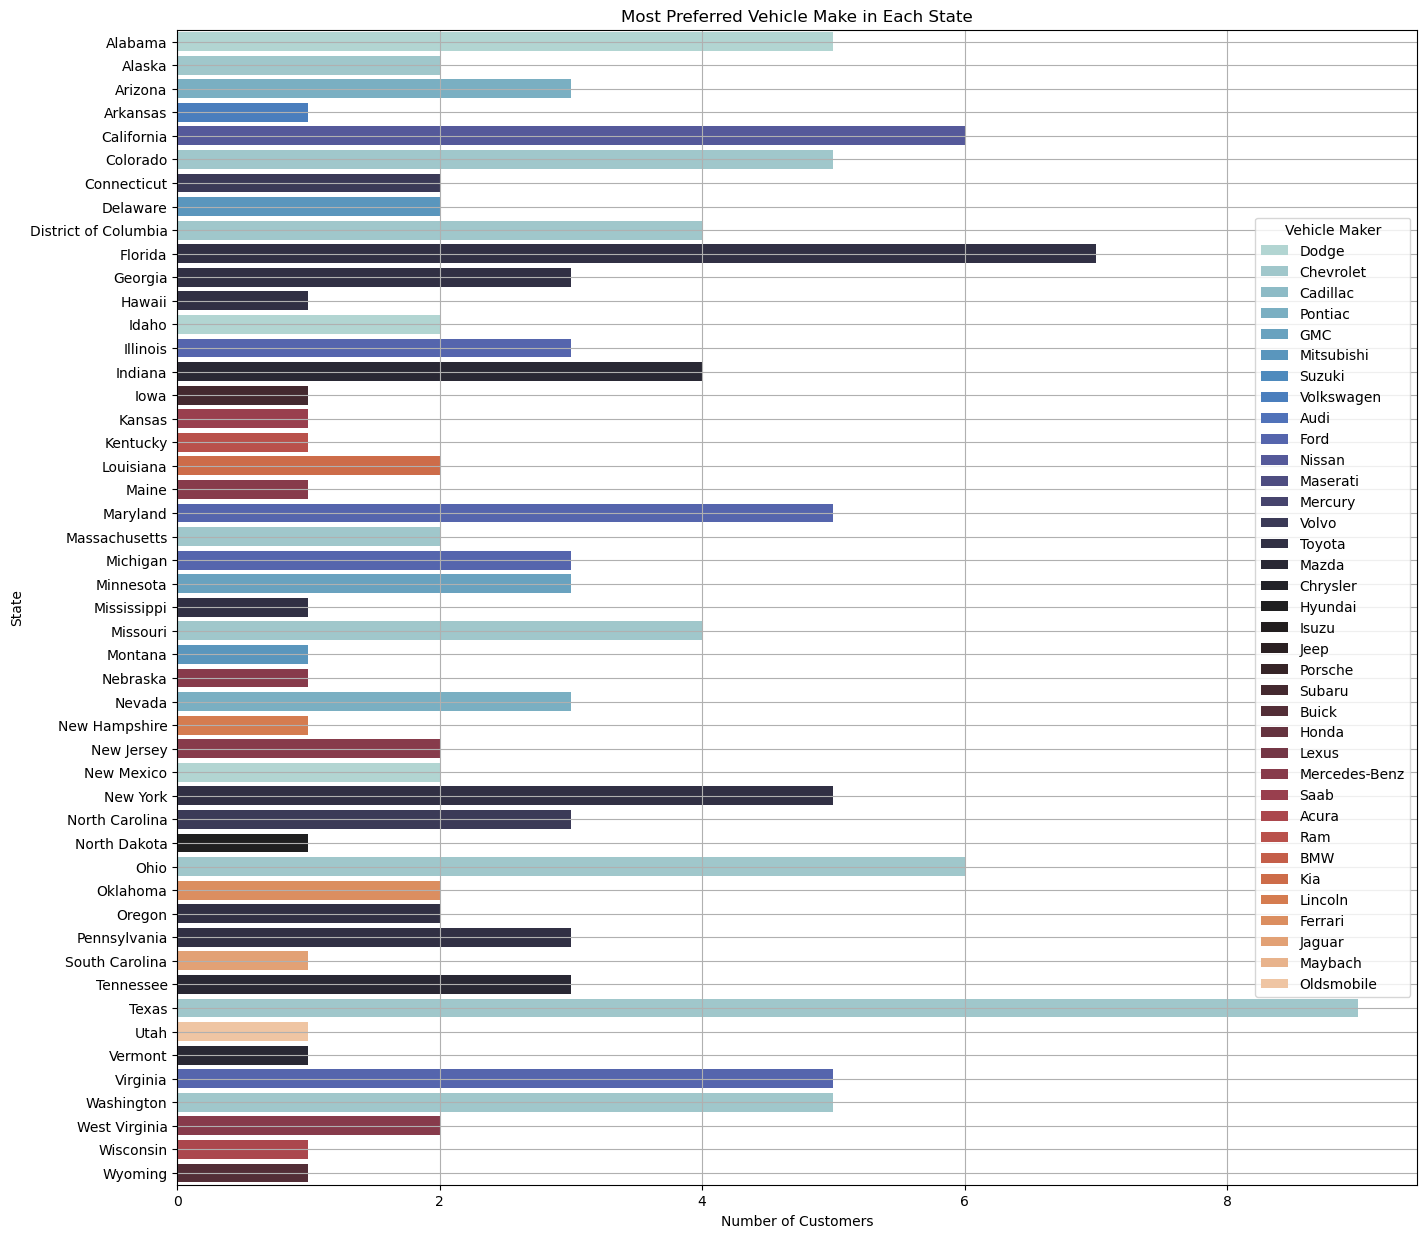

In [11]:
# Set up the figure and axis
plt.figure(figsize=(16, 15))

# Create the bar plot
sns.barplot(x='no_of_cust', y='state', hue='vehicle_maker', data=data5, dodge=False, palette='icefire')

# Add labels and title
plt.xlabel('Number of Customers')
plt.ylabel('State')
plt.title('Most Preferred Vehicle Make in Each State')
plt.legend(title='Vehicle Maker')
plt.grid(True)

# Show the plot
plt.show()

In [12]:
# Run a SQL query and load the result into a pandas DataFrame
query6 = """
SELECT 
	  quarter_number, 
	  count(*) as total_orders
FROM nw.order_t
GROUP BY quarter_number
ORDER BY quarter_number ASC;
"""
# Execute the query
cursor.execute(query6)

# Fetch the data and load it into a pandas DataFrame
data6 = pd.DataFrame(cursor.fetchall(), columns=['quarter_number','total_orders'])

# Display the first few rows to verify
print(data6.head())

   quarter_number  total_orders
0               1           310
1               2           262
2               3           229
3               4           199


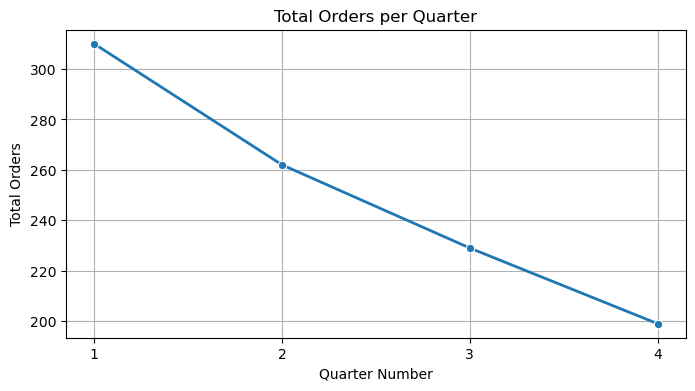

In [13]:
# Set up the figure and axis
plt.figure(figsize=(8, 4))

# Create the line plot
sns.lineplot(x='quarter_number', y='total_orders', data=data6, marker='o', linewidth=2)

# Add labels and title
plt.xlabel('Quarter Number')
plt.ylabel('Total Orders')
plt.title('Total Orders per Quarter')
plt.xticks(data6['quarter_number'])
plt.grid(True)

# Show the plot
plt.show()

In [14]:
# Run a SQL query and load the result into a pandas DataFrame
query7 = """
WITH QoQ AS 
(
    SELECT
        quarter_number,
        SUM(quantity * vehicle_price) AS revenue
    FROM nw.order_t
    GROUP BY quarter_number
)
SELECT
    quarter_number,
    revenue,
    LAG(revenue) OVER (ORDER BY quarter_number) AS previous_revenue,
    ((revenue - LAG(revenue) OVER (ORDER BY quarter_number)) / LAG(revenue) OVER (ORDER BY quarter_number)) * 100 AS qoq_perc_change
FROM QoQ;
"""
# Execute the query
cursor.execute(query7)

# Fetch the data and load it into a pandas DataFrame
data7 = pd.DataFrame(cursor.fetchall(), columns=['quarter_number','revenue','previous_revenue','qoq_perc_change'])

# Display the first few rows to verify
print(data7.head())

   quarter_number      revenue previous_revenue qoq_perc_change
0               1  39637630.97             None            None
1               2  32913737.76      39637630.97      -16.963408
2               3  29435427.48      32913737.76      -10.567959
3               4  23496008.22      29435427.48      -20.177792


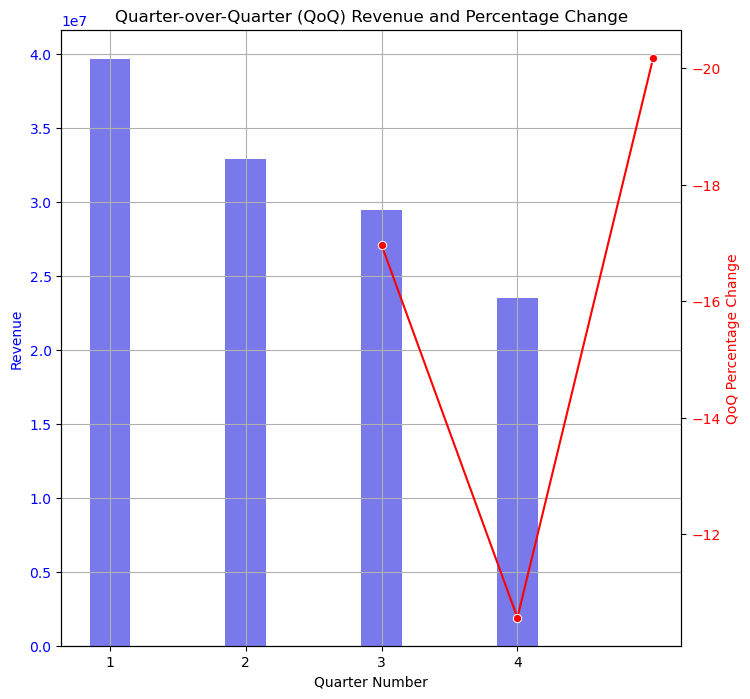

In [15]:
# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(8, 8))

# Bar plot for revenue
sns.barplot(x='quarter_number', y='revenue', data=data7, ax=ax1, color='b', alpha=0.6, width=0.3)
ax1.set_xlabel('Quarter Number')
ax1.set_ylabel('Revenue', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the percentage change
ax2 = ax1.twinx()
sns.lineplot(x='quarter_number', y='qoq_perc_change', data=data7, ax=ax2, color='r', marker='o')
ax2.set_ylabel('QoQ Percentage Change', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and grid
plt.title('Quarter-over-Quarter (QoQ) Revenue and Percentage Change')
ax1.grid(True)

# Show the plot
plt.show()


In [16]:
# Run a SQL query and load the result into a pandas DataFrame
query8 = """
SELECT  
    quarter_number,
    SUM(quantity * vehicle_price) AS revenue,
    COUNT(order_id) AS total_orders
FROM nw.order_t
GROUP BY quarter_number
ORDER BY quarter_number;
"""
# Execute the query
cursor.execute(query8)

# Fetch the data and load it into a pandas DataFrame
data8 = pd.DataFrame(cursor.fetchall(), columns=['quarter_number','revenue','total_orders'])

# Display the first few rows to verify
print(data8.head())

   quarter_number      revenue  total_orders
0               1  39637630.97           310
1               2  32913737.76           262
2               3  29435427.48           229
3               4  23496008.22           199


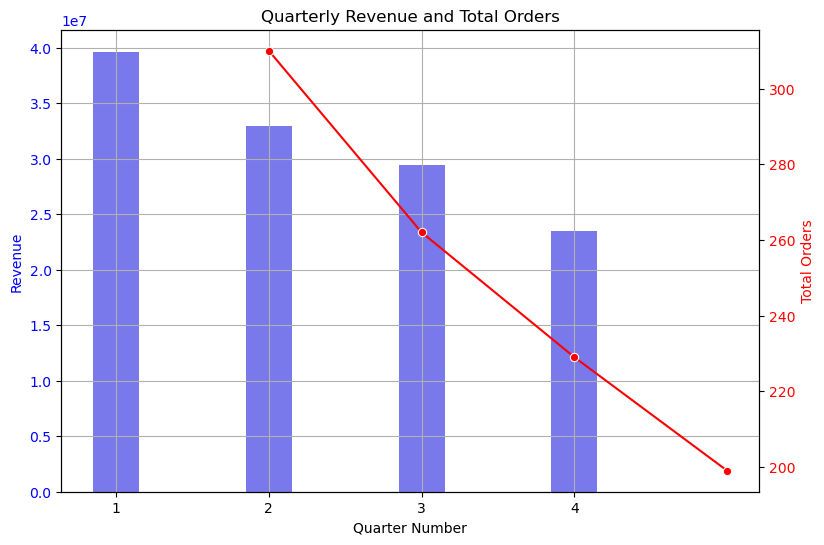

In [17]:
# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(9, 6))

# Bar plot for revenue
sns.barplot(x='quarter_number', y='revenue', data=data8, ax=ax1, color='b', alpha=0.6, width=0.3)
ax1.set_xlabel('Quarter Number')
ax1.set_ylabel('Revenue', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the total orders
ax2 = ax1.twinx()
sns.lineplot(x='quarter_number', y='total_orders', data=data8, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Total Orders', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and grid
plt.title('Quarterly Revenue and Total Orders')
ax1.grid(True)

# Show the plot
plt.show()

In [18]:
# Run a SQL query and load the result into a pandas DataFrame
query9 = """
SELECT 
    credit_card_type, 
    AVG(discount) AS average_discount
FROM nw.order_t ord 
JOIN nw.customer_t cust ON ord.customer_id = cust.customer_id
GROUP BY credit_card_type
ORDER BY average_discount DESC;
"""
# Execute the query
cursor.execute(query9)

# Fetch the data and load it into a pandas DataFrame
data9 = pd.DataFrame(cursor.fetchall(), columns=['credit_card_type','average_discount'])

# Display the first few rows to verify
print(data9.head())

  credit_card_type average_discount
0            laser         0.643846
1       mastercard         0.629500
2          maestro         0.624219
3    visa-electron         0.623469
4   china-unionpay         0.622174


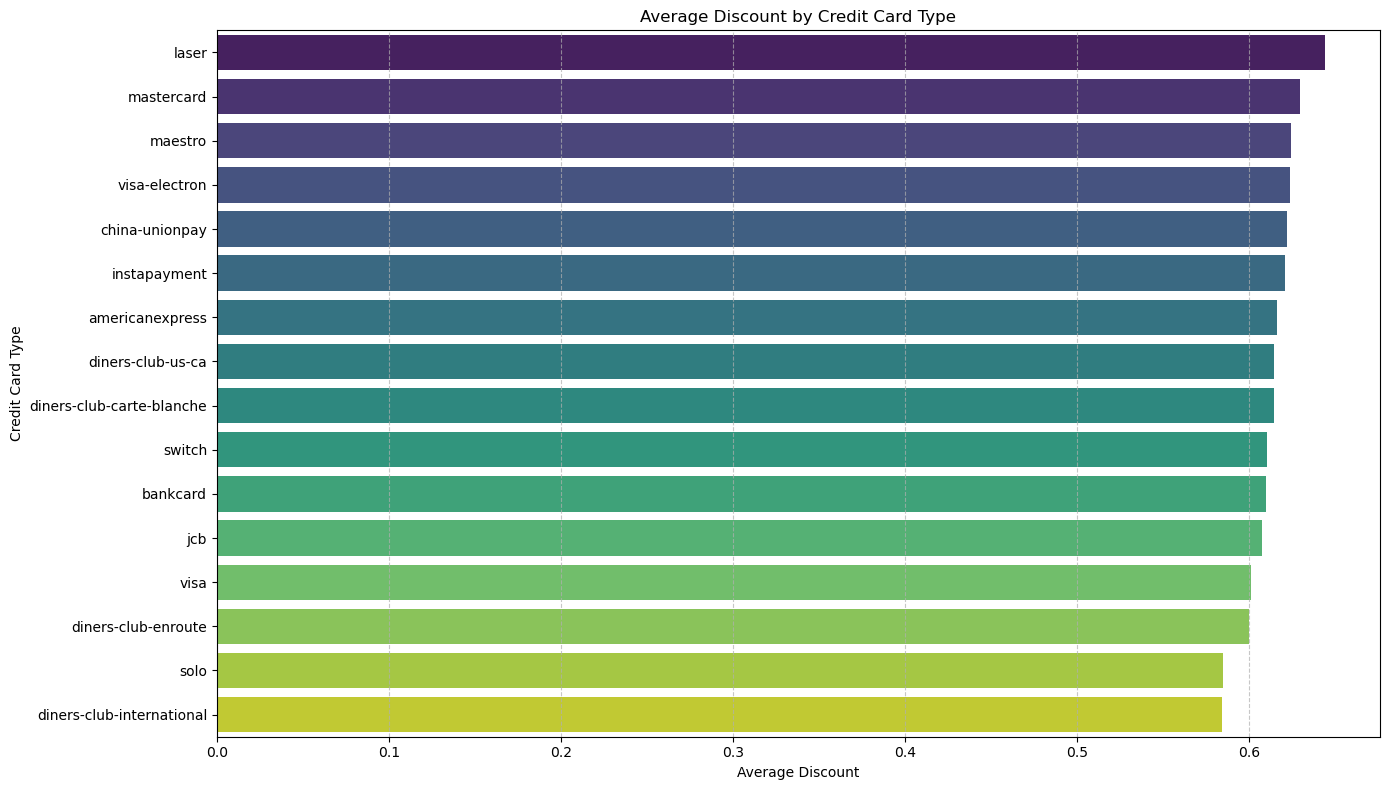

In [19]:
# Sort data by average discount
data9 = data9.sort_values(by='average_discount', ascending=False)

# Create a bar plot with a nicer color palette and gridlines
plt.figure(figsize=(14, 8))
sns.barplot(x='average_discount', y='credit_card_type', data=data9, palette='viridis')

# Add labels and title
plt.xlabel('Average Discount')
plt.ylabel('Credit Card Type')
plt.title('Average Discount by Credit Card Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [20]:
# Run a SQL query and load the result into a pandas DataFrame
query10 = """
SELECT 
    quarter_number, 
    AVG(DATEDIFF(ship_date, order_date)) AS average_shipping_time
FROM nw.order_t
GROUP BY quarter_number
ORDER BY quarter_number;
"""
# Execute the query
cursor.execute(query10)

# Fetch the data and load it into a pandas DataFrame
data10 = pd.DataFrame(cursor.fetchall(), columns=['quarter_number','average_shipping_time'])

# Display the first few rows to verify
print(data10.head())

   quarter_number average_shipping_time
0               1               57.1677
1               2               71.1107
2               3              117.7555
3               4              174.0955


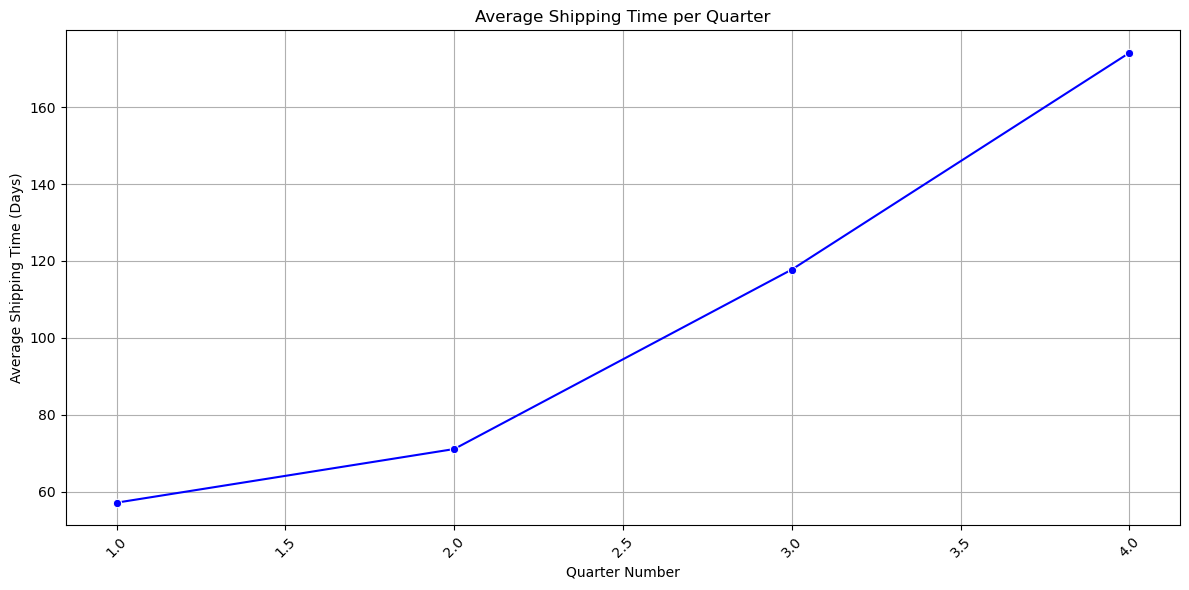

In [21]:
# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data10, x='quarter_number', y='average_shipping_time', marker='o', color='b')

# Add labels and title
plt.xlabel('Quarter Number')
plt.ylabel('Average Shipping Time (Days)')
plt.title('Average Shipping Time per Quarter')
plt.xticks(rotation=45)

# Add gridlines for better readability
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
